In [3]:
%matplotlib inline
from alpha_vantage.timeseries import TimeSeries
import matplotlib
import matplotlib.pyplot as plt
import os

matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
ALPHA_VANTAGE_API_KEY = os.environ['AV_API_KEY']

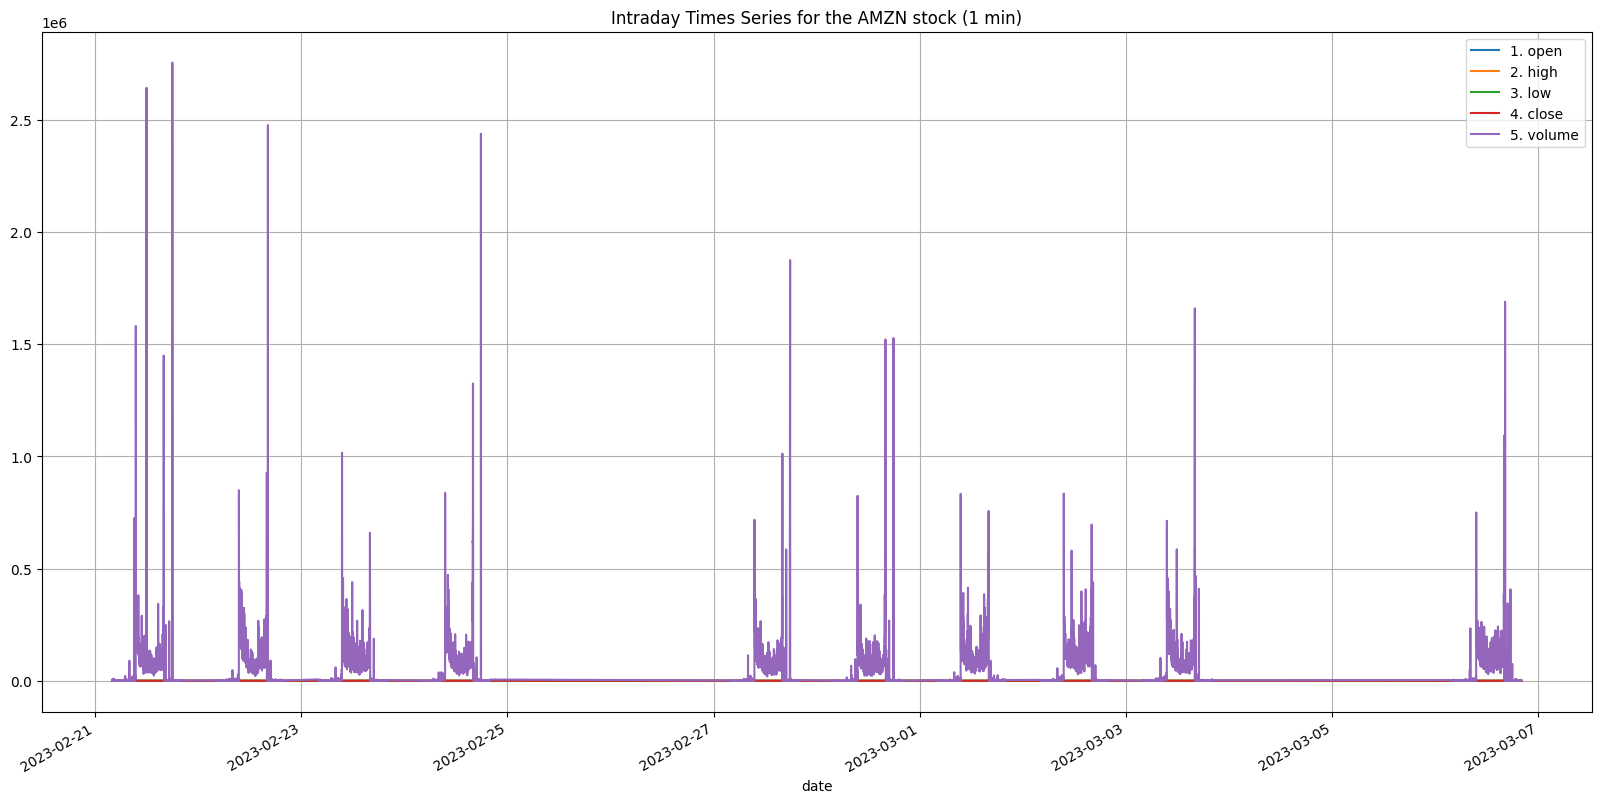

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2023-03-06 20:00:00,93.67,93.75,93.6700,93.7500,2410.0
2023-03-06 19:59:00,93.68,93.68,93.6800,93.6800,723.0
2023-03-06 19:58:00,93.73,93.73,93.6701,93.6701,3197.0
2023-03-06 19:56:00,93.79,93.79,93.7100,93.7100,3373.0
2023-03-06 19:55:00,93.80,93.81,93.8000,93.8000,1844.0


In [6]:
  # Initialize the TimeSeries class with key and output format 
ts = TimeSeries(key=ALPHA_VANTAGE_API_KEY, output_format='pandas') 
 
# Get json object with the intraday data and information of the data 
intraday_data, data_info = ts.get_intraday('AMZN', outputsize='full', interval='1min') 

intraday_data.plot()
plt.title('Intraday Times Series for the AMZN stock (1 min)')
plt.grid()
plt.show()

In [2]:
from yahoo_fin import stock_info

# Real-time daily!
si = stock_info.get_quote_data("AMZN")
market_data = {
    'Open': si['regularMarketOpen'], 
    'High': si['regularMarketDayHigh'], 
    'Low': si['regularMarketDayLow'], 
    'Close': si['regularMarketPrice'], 
    'Volume': si['regularMarketVolume']
}

print(market_data)

{'Open': 95.19, 'High': 96.545, 'Low': 93.74, 'Close': 93.75, 'Volume': 52112355}
